<a href="https://colab.research.google.com/github/quddaz/Machine_Learing/blob/main/9%EC%9E%A5/9-2%2C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9-2 순환 신경망으로 IMDB 리뷰 분류

In [1]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## IMDB 리뷰 데이터셋

In [2]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=300)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [4]:
print(len(train_input[0]))

218


In [5]:
print(len(train_input[1]))

189


In [6]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [7]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [8]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [9]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

print(np.mean(lengths), np.median(lengths))

239.00925 178.0


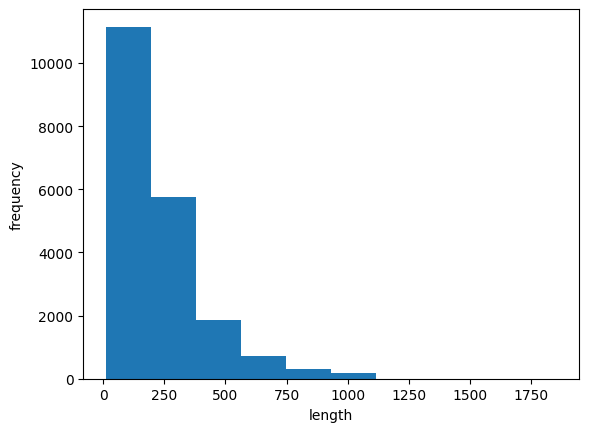

In [10]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
print(train_seq.shape)

(20000, 100)


In [12]:
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [13]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [14]:

print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94 205   2  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [15]:
val_seq = pad_sequences(val_input, maxlen=100)

## 순환 신경망 만들기

In [16]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 300)))
model.add(keras.layers.Dense(1, activation='sigmoid'))
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape)

(20000, 100, 300)


In [17]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [18]:
print(np.sum(train_oh[0][0]))

1.0


In [19]:
val_oh = keras.utils.to_categorical(val_seq)

In [20]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 2472      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 2481 (9.69 KB)
Trainable params: 2481 (9.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 순환 신경망 훈련

In [21]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 19s 49ms/step - loss: 0.7003 - accuracy: 0.5002 - val_loss: 0.6970 - val_accuracy: 0.5058
Epoch 2/100
  4/313 [..............................] - ETA: 6s - loss: 0.6961 - accuracy: 0.5352

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 10s 33ms/step - loss: 0.6956 - accuracy: 0.5123 - val_loss: 0.6946 - val_accuracy: 0.5124
Epoch 3/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6917 - accuracy: 0.5282 - val_loss: 0.6909 - val_accuracy: 0.5318
Epoch 4/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6844 - accuracy: 0.5549 - val_loss: 0.6833 - val_accuracy: 0.5690
Epoch 5/100
313/313 [==============================] - 16s 51ms/step - loss: 0.6784 - accuracy: 0.5778 - val_loss: 0.6797 - val_accuracy: 0.5770
Epoch 6/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6733 - accuracy: 0.5891 - val_loss: 0.6753 - val_accuracy: 0.5862
Epoch 7/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6679 - accuracy: 0.6057 - val_loss: 0.6695 - val_accuracy: 0.5970
Epoch 8/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6614 - accuracy: 0.6197 - val_loss: 0.6636 - val_accuracy: 0.609

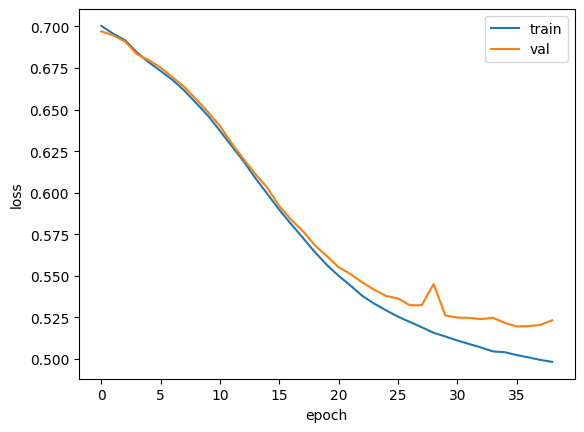

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 단어 임베딩

In [23]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(300, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           4800      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5009 (19.57 KB)
Trainable params: 5009 (19.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 28ms/step - loss: 0.6893 - accuracy: 0.5351 - val_loss: 0.6706 - val_accuracy: 0.5872
Epoch 2/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6399 - accuracy: 0.6467 - val_loss: 0.6234 - val_accuracy: 0.6664
Epoch 3/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6051 - accuracy: 0.6941 - val_loss: 0.6003 - val_accuracy: 0.6948
Epoch 4/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5831 - accuracy: 0.7172 - val_loss: 0.5888 - val_accuracy: 0.7026
Epoch 5/100
313/313 [==============================] - 8s 27ms/step - loss: 0.5663 - accuracy: 0.7305 - val_loss: 0.5669 - val_accuracy: 0.7300
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 0.5527 - accuracy: 0.7408 - val_loss: 0.5536 - val_accuracy: 0.7356
Epoch 7/100
313/313 [==============================] - 8s 26ms/step - loss: 0.5410 - accuracy: 0.7475 - val_loss: 0.5422 - val_accuracy

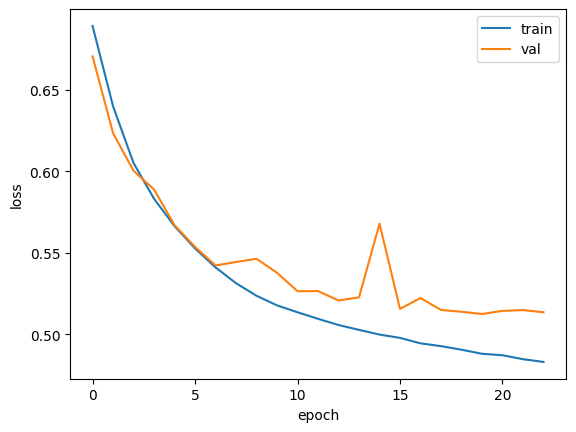

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 9-3 LSTM과 GRU 셀

In [26]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 42ms/step - loss: 0.6927 - accuracy: 0.5277 - val_loss: 0.6924 - val_accuracy: 0.5368
Epoch 2/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6916 - accuracy: 0.5677 - val_loss: 0.6911 - val_accuracy: 0.5668
Epoch 3/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6896 - accuracy: 0.6011 - val_loss: 0.6883 - val_accuracy: 0.6062
Epoch 4/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6842 - accuracy: 0.6363 - val_loss: 0.6792 - val_accuracy: 0.6618
Epoch 5/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6589 - accuracy: 0.6827 - val_loss: 0.6277 - val_accuracy: 0.7076
Epoch 6/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6084 - accuracy: 0.7135 - val_loss: 0.5964 - val_accuracy: 0.7114
Epoch 7/100
313/313 [==============================] - 14s 44ms/step - loss: 0.5834 - accuracy: 0.7280 - val_loss: 0.5746 - val_ac

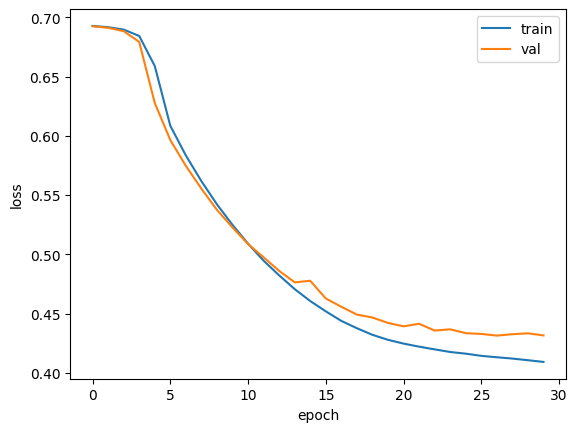

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 순환 층에 드롭아웃 적용

In [30]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 48ms/step - loss: 0.6924 - accuracy: 0.5317 - val_loss: 0.6917 - val_accuracy: 0.5696
Epoch 2/100
313/313 [==============================] - 14s 46ms/step - loss: 0.6907 - accuracy: 0.5788 - val_loss: 0.6897 - val_accuracy: 0.5984
Epoch 3/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6879 - accuracy: 0.6057 - val_loss: 0.6861 - val_accuracy: 0.6232
Epoch 4/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6826 - accuracy: 0.6251 - val_loss: 0.6787 - val_accuracy: 0.6392
Epoch 5/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6674 - accuracy: 0.6511 - val_loss: 0.6529 - val_accuracy: 0.6630
Epoch 6/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6258 - accuracy: 0.6999 - val_loss: 0.6108 - val_accuracy: 0.7108
Epoch 7/100
313/313 [==============================] - 14s 44ms/step - loss: 0.5967 - accuracy: 0.7250 - val_loss: 0.5894 - val_ac

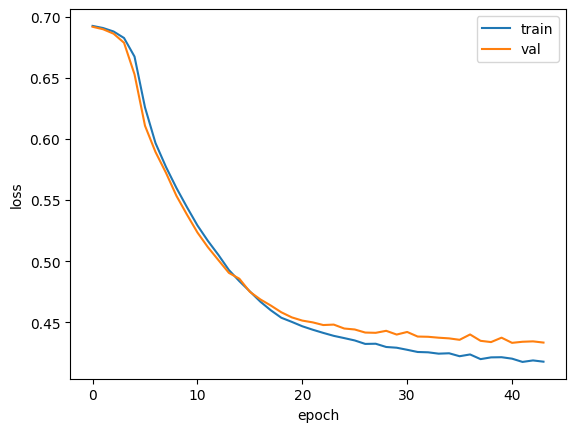

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 2개의 층을 연결하기

In [32]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
313/313 [==============================] - 37s 99ms/step - loss: 0.6929 - accuracy: 0.5168 - val_loss: 0.6927 - val_accuracy: 0.5280
Epoch 2

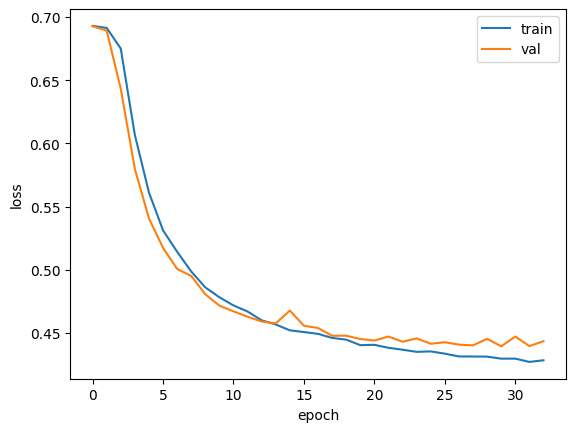

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## GRU 신경망 훈련하기

In [34]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 19s 50ms/step - loss: 0.6920 - accuracy: 0.5486 - val_loss: 0.6912 - val_accuracy: 0.5724
Epoch 2/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6898 - accuracy: 0.5790 - val_loss: 0.6889 - val_accuracy: 0.5830
Epoch 3/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6865 - accuracy: 0.5975 - val_loss: 0.6852 - val_accuracy: 0.5958
Epoch 4/100
313/313 [==============================] - 14s 46ms/step - loss: 0.6813 - accuracy: 0.6107 - val_loss: 0.6792 - val_accuracy: 0.5994
Epoch 5/100
313/313 [==============================] - 14s 46ms/step - loss: 0.6732 - accuracy: 0.6204 - val_loss: 0.6701 - val_accuracy: 0.6134
Epoch 6/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6608 - accuracy: 0.6387 - val_loss: 0.6556 - val_accuracy: 0.6302
Epoch 7/100
313/313 [==============================] - 16s 52ms/step - loss: 0.6404 - accuracy: 0.6581 - val_loss: 0.6304 - val_ac

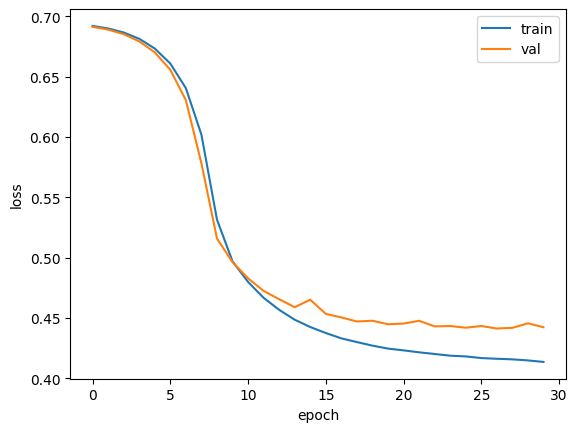

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [37]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.h5')

rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 15s 17ms/step - loss: 0.4346 - accuracy: 0.7975


[0.434622585773468, 0.7974799871444702]